<a href="https://colab.research.google.com/github/gtimokhina/homework_1_directory/blob/master/LinearRegression_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from fastai.basics import *

## Linear Regression

#### generate random data

In [0]:
n=100

In [3]:

x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[0.1433, 1.0000],
        [0.3133, 1.0000],
        [0.9743, 1.0000],
        [0.3257, 1.0000],
        [0.3036, 1.0000]])

In [4]:
a = tensor(3.,2); a

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)

#### visualize data

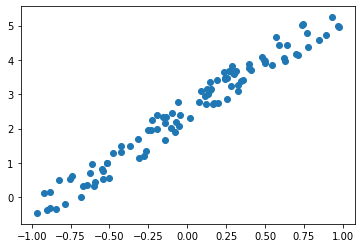

In [6]:
plt.scatter(x[:,0], y);

#### define mean square error (MSE)

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

#### try random weights a = (-1,1)

In [0]:
a = tensor(-1.,1)

In [9]:
y_hat = x@a
mse(y_hat, y)

tensor(6.4153)

#### check how it looks like

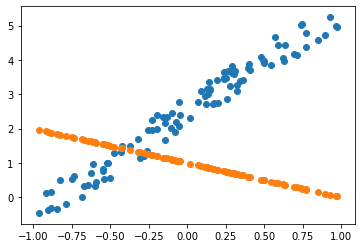

In [10]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

# Gradient descent

In [11]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [13]:
lr = 1e-1
for t in range(100): update()

tensor(6.4153, grad_fn=<MeanBackward0>)
tensor(1.4781, grad_fn=<MeanBackward0>)
tensor(0.5543, grad_fn=<MeanBackward0>)
tensor(0.2445, grad_fn=<MeanBackward0>)
tensor(0.1378, grad_fn=<MeanBackward0>)
tensor(0.1010, grad_fn=<MeanBackward0>)
tensor(0.0883, grad_fn=<MeanBackward0>)
tensor(0.0839, grad_fn=<MeanBackward0>)
tensor(0.0824, grad_fn=<MeanBackward0>)
tensor(0.0819, grad_fn=<MeanBackward0>)


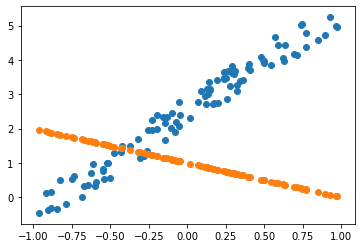

In [19]:
plt.scatter(x[:,0],y)
with torch.no_grad():
    plt.scatter(x[:,0],x@a);

# Animate

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [20]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
with torch.no_grad():
  line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    with torch.no_grad():
      line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)